# Coursera Capstone Project
#### *Clustering New York City Neighborhoods by Median Household Income, Crime Rates and the Number of Government Buildings*
#### Ceren Naz Ungan

#### Introduction

In the final project of IBM's Data Science Professional Certificate course, I will analyze the neighborhoods in New York City and form clusters. The aim of the project is to explore further the underlying patterns in Manhattan neighborhoods by the help of machine learning techniques, more specifically k-means clustering. This project might be of use to city planners, business owners or anyone who'd like to have an in depth understanding about the neighborhoods in a  given city. In every city we sense certain ways of groupings such as residential, industrial and maybe more commercially concentrated areas. Unless these neighborhoods are named after their purpose, it might be hard to understand the nature of them. For deliberately planned cities - like NYC - it is relatively easier to know on our own and also to cluster the neighborhoods. Therefore, the scope of this project was suitable for beginner level clustering and enabled ease of interpretation of the outcomes. 

#### Data Collection, Understanding and Preparation 
One of the most important and the most troublesome phase of th project was the data collection. Many resources are not publicly available which makes the precision of the analysis more difficult to achieve. Yet devoting, time and effort to this phase taught me to be patient and thorough with finding, cleaning and preparing the data for the analysis. Although having learned in theory that this part takes the most time compared to the other parts of the project, now I practically experienced that I should not expect this process to be smooth and fast. In fact, taking time on this phase made the following sections easier to perform. 

I used three sources of data. First, I constructed a table by scraping data from city-data.com and areavibes.com. Consisting information of Median Household Income (city-data) and Crime Rate (areavibes) belonging to the 40 neighborhoods in the Manhattan borough, the data was of the year 2017. Second dataset was a json file which I reached via Coursera that consists each neighborhood's latitude and longitude values. Third, I used Foursquare API by creating a developer account to get the government buildings in each neighborhood. With all these data at hand, I tried to find correlations and hidden patterns among median income, crime rate and the number of government buildings.

1) Let's start by importing the necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

In [2]:
df = pd.read_csv('manhattan_neigh.csv', header = None)

In [3]:
df.head()

,0,1,2,3
0,Yorkville,Manhattan,98840,11.00
1,Battery Park City,Manhattan,125434,12.77
2,Carnegie Hill,Manhattan,125140,8.59
3,Central Harlem,Manhattan,41490,28.73
4,Chelsea,Manhattan,108570,36.97


In [4]:
df.rename(columns = {0:'Neighborhood',1:'Borough',2:'Median Household Income', 3:'Crime Rate (per 1000 people)'}, inplace=True)
df.head()

,Neighborhood,Borough,Median Household Income,Crime Rate (per 1000 people)
0,Yorkville,Manhattan,98840,11.00
1,Battery Park City,Manhattan,125434,12.77
2,Carnegie Hill,Manhattan,125140,8.59
3,Central Harlem,Manhattan,41490,28.73
4,Chelsea,Manhattan,108570,36.97


In [5]:
df.shape

(40, 4)

2) The dataset consist of Median Household Income and Crime Rate of 40 Neighborhoods in the Manhattan Borough. These belong to the year 2017 and was collected from city-data.com and areavibes.com respectively.

In [6]:
manhattan_neigh = df[df['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_neigh.head()

,Neighborhood,Borough,Median Household Income,Crime Rate (per 1000 people)
0,Yorkville,Manhattan,98840,11.00
1,Battery Park City,Manhattan,125434,12.77
2,Carnegie Hill,Manhattan,125140,8.59
3,Central Harlem,Manhattan,41490,28.73
4,Chelsea,Manhattan,108570,36.97


In [7]:
manhattan_neigh.shape

(40, 4)

3) The second dataset for the analysis is the json file consisting each neighborhood's latitudes and longitudes obtained from Coursera.

In [8]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [9]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [11]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [12]:
neighborhoods_data = newyork_data['features']

In [13]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [14]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [15]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


4) Filtering out the boroughs other than Manhattan will be essential for the analysis

In [16]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)


5) Let's ensure if the two datasets have equal amount of neighborhoods.

In [17]:
manhattan_data.shape

(40, 4)

6) Merge the datasets into *df_merged*

In [111]:
df_merged = pd.merge(manhattan_neigh,manhattan_data,on=['Neighborhood','Borough'])
df_merged

,Neighborhood,Borough,Median Household Income,Crime Rate (per 1000 people),Latitude,Longitude
0,Yorkville,Manhattan,98840,11.00,40.775930,-73.947118
1,Battery Park City,Manhattan,125434,12.77,40.711932,-74.016869
2,Carnegie Hill,Manhattan,125140,8.59,40.782683,-73.953256
3,Central Harlem,Manhattan,41490,28.73,40.815976,-73.943211
4,Chelsea,Manhattan,108570,36.97,40.744035,-74.003116
5,Chinatown,Manhattan,35908,41.88,40.715618,-73.994279
6,Civic Center,Manhattan,166436,17.91,40.715229,-74.005415
7,Clinton,Manhattan,73591,6.94,40.759101,-73.996119
8,East Harlem,Manhattan,37471,39.99,40.792249,-73.944182
9,East Village,Manhattan,72665,29.91,40.727847,-73.982226


In [112]:
df_merged.head()

,Neighborhood,Borough,Median Household Income,Crime Rate (per 1000 people),Latitude,Longitude
0,Yorkville,Manhattan,98840,11.00,40.775930,-73.947118
1,Battery Park City,Manhattan,125434,12.77,40.711932,-74.016869
2,Carnegie Hill,Manhattan,125140,8.59,40.782683,-73.953256
3,Central Harlem,Manhattan,41490,28.73,40.815976,-73.943211
4,Chelsea,Manhattan,108570,36.97,40.744035,-74.003116


In [19]:
df_merged.shape

(40, 6)

In [20]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


7) To see our neighborhoods and have a general outlook about the city, let's create a map of NYC

In [21]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for lat, lng, label in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

##### Foursquare API

In [23]:
CLIENT_ID = 'VXH2UEH1GIUWSJ0RXLF3JAG4IAKYEVVOTPE5OFGANX33AVBK' 
CLIENT_SECRET = 'UR0TDUQ24XS02YY2DY0IBRHBNWLF3MSVXMEIV231ETPFC0FE'
VERSION = '20200512'
LIMIT = 100 

radius = 500 
categoryId = '4bf58dd8d48988d126941735'
latitude = 40.7896239
longitude = -73.9598939

1) In this section, describe a function *getNearbyVenues* to retrieve venues in the 500 meter radius from the center of each neighborhood. 

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [26]:

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


2) Let's have a look at the venues dataset. We see that there are 670 venues returned.

In [27]:
print(manhattan_venues.shape)
manhattan_venues.head()


(670, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.910660,New York City Marshall,40.875897,-73.909060,Government Building
1,Marble Hill,40.876551,-73.910660,US Post Office,40.877299,-73.906279,Government Building
2,Chinatown,40.715618,-73.994279,NYC - HRA Chinatown,40.718652,-73.993646,Government Building
3,Chinatown,40.715618,-73.994279,Henry Street,40.712603,-73.993210,Government Building
4,Chinatown,40.715618,-73.994279,"NYC Department Of Health, Hospitals and Sanita...",40.713396,-73.997956,Government Building


#### Methodology 
After creating a map of Manhattan, NYC and using Foursquare API to get the venues in the 'Government Building' category in each neighborhood, we can proceed to the analytics and visualization phase. 
Since one of the attributes of the clustering dataset will be the number of government buildings in each neighborhood, I will create another data frame in which the frequency is shown and plot the graph for it. To explore our data, using *.describe()* I extracted the mean, standard deviation, upper and lower quartiles, median, minimum and maximum values for each attribute in our data frame. Then, to test for the strength of the association between the variables, I used correlation and checked the coefficient and the p-value to see if the relation was significant. Turns out, number of government buildings and the median household income in the neighborhood have a moderate but statistically significant correlation with the coefficient of 0.56 and a p-value of 0.0001. 

Lastly, I will start clustering the neighborhoods as the main objective of this project is to identify relationships. As I stated earlier, the project aims to reveal relationships among the observations that was perhaps not possible to with the individual observations. It also simplifies the data by viewing each observation (neighborhoods) as a member of a cluster and profiling them according to their general characteristics. The overall goal of the project requires clustering and more specifically non-hierarchical k-means algorithm. To interpret features with different magnitudes and distributions equally, I will normalize the values in my main data frame to proceed with a better clustering. Additionally, to determine the best number of clusters to form, I will check the distortion for each value of k from 1 to 10. Then performing the k-means, I come up with the clustered neighborhoods and look for the characteristics and discuss them in the result section.  

In [28]:
df_counts = manhattan_venues['Neighborhood'].value_counts().to_frame('Number of Government Buildings').reset_index().rename(columns = {'index':'Neighborhood'})
df_counts.head()

,Neighborhood,Number of Government Buildings
0,Civic Center,100
1,Financial District,97
2,Turtle Bay,74
3,Tudor City,38
4,Midtown,36


In [ ]:
#df_merged.drop('Number of Government Buildings', 1, inplace = True)

In [29]:
df_merged = pd.merge(df_merged,df_counts,on=['Neighborhood'])


Here's a frequency distribution of the Neighborhoods with their Number of Government Buildings.
We see that Civic Center, Battery Park City and Turtle Bay have the highest amount of Government Buildings in Manhattan.

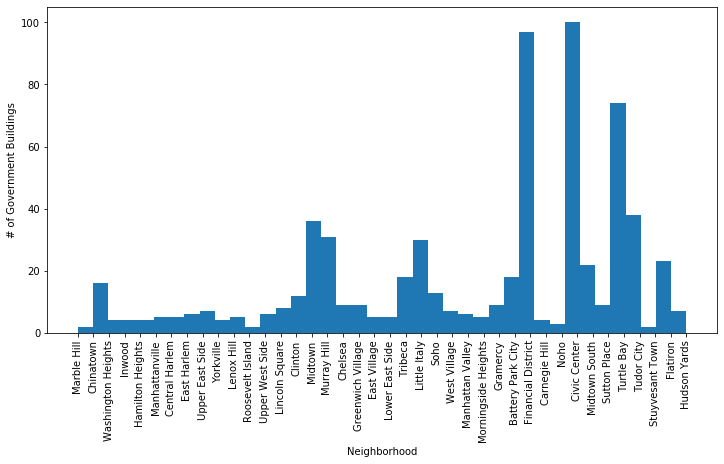

In [114]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.hist(manhattan_venues['Neighborhood'], density=False, bins=40, )  # `density=False` would make counts
plt.ylabel('# of Government Buildings')
plt.xlabel('Neighborhood')
plt.xticks(rotation='vertical');

The exploratory analysis is the important step towards deciding on the right kind of analytical methods.

In [33]:
df_merged.describe()

,Median Household Income,Crime Rate (per 1000 people),Latitude,Longitude,Number of Government Buildings
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,94206.625000,28.153750,40.762438,-73.975329,16.750000
std,36644.099731,20.102729,0.043177,0.025493,23.417887
min,29182.000000,6.940000,40.707107,-74.016869,2.000000
25%,65038.500000,16.672500,40.727618,-73.996416,5.000000
50%,100670.500000,21.145000,40.753367,-73.979611,7.000000
75%,119608.750000,33.837500,40.783926,-73.958491,18.000000
max,171588.000000,87.090000,40.876551,-73.910660,100.000000


Have a look at the data types we have

In [34]:
print(df_merged.dtypes)

Neighborhood                       object
Borough                            object
Median Household Income             int64
Crime Rate (per 1000 people)      float64
Latitude                          float64
Longitude                         float64
Number of Government Buildings      int64
dtype: object


In [35]:
df_main = df_merged[['Neighborhood','Median Household Income','Crime Rate (per 1000 people)','Number of Government Buildings']]
df_main.set_index('Neighborhood',inplace = True)
df_main.head()

,Median Household Income,Crime Rate (per 1000 people),Number of Government Buildings
Neighborhood,,,
Yorkville,98840,11.00,4
Battery Park City,125434,12.77,18
Carnegie Hill,125140,8.59,4
Central Harlem,41490,28.73,5
Chelsea,108570,36.97,9


In [36]:
df_main.corr()

,Median Household Income,Crime Rate (per 1000 people),Number of Government Buildings
Median Household Income,1.000000,0.013167,0.559013
Crime Rate (per 1000 people),0.013167,1.000000,0.109254
Number of Government Buildings,0.559013,0.109254,1.000000


Let's plot this relation

(0, 106.19940364876848)

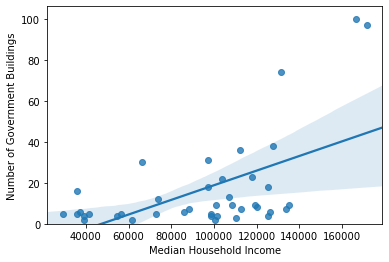

In [37]:
import seaborn as sns
sns.regplot(x="Median Household Income", y="Number of Government Buildings", data=df_main)
plt.ylim(0,)

There is a positive relation because the slope of the line is positive.  

In [38]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df_main['Median Household Income'], df_main['Number of Government Buildings'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5590130283140978  with a P-value of P = 0.00017727247328931734


We see a moderate correlation with high significance.

In [48]:
#normalize the data

from sklearn.preprocessing import StandardScaler

X = df_main.values[:,1:]
X = np.nan_to_num(X)
df_clust = StandardScaler().fit_transform(X)
df_clust

array([[-0.86417512, -0.55139163],
       [-0.7750057 ,  0.054058  ],
       [-0.98558659, -0.55139163],
       [ 0.02903044, -0.50814523],
       [ 0.44414684, -0.33515962],
       [ 0.69150382, -0.0324348 ],
       [-0.51606173,  3.60026299],
       [-1.06871063, -0.20542041],
       [ 0.59628902, -0.46489883],
       [ 0.08847672, -0.50814523],
       [-0.16391808,  3.47052379],
       [-0.55787564,  0.27029001],
       [ 0.24817563, -0.33515962],
       [ 1.16405138, -0.33515962],
       [-0.66165474, -0.55139163],
       [ 0.16505159, -0.42165242],
       [-0.63545807, -0.55139163],
       [-0.55938698, -0.50814523],
       [-0.93873486, -0.37840602],
       [ 0.18671422,  0.57301483],
       [-0.02336289, -0.50814523],
       [-0.54175461, -0.46489883],
       [-0.51656551, -0.50814523],
       [-0.82991794, -0.63788443],
       [ 2.96910243,  0.83249324],
       [ 2.96910243,  0.22704361],
       [-0.49691801, -0.50814523],
       [ 0.40082159,  0.61626123],
       [-0.92462896,

In [49]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_clust)
    distortions.append(kmeanModel.inertia_)

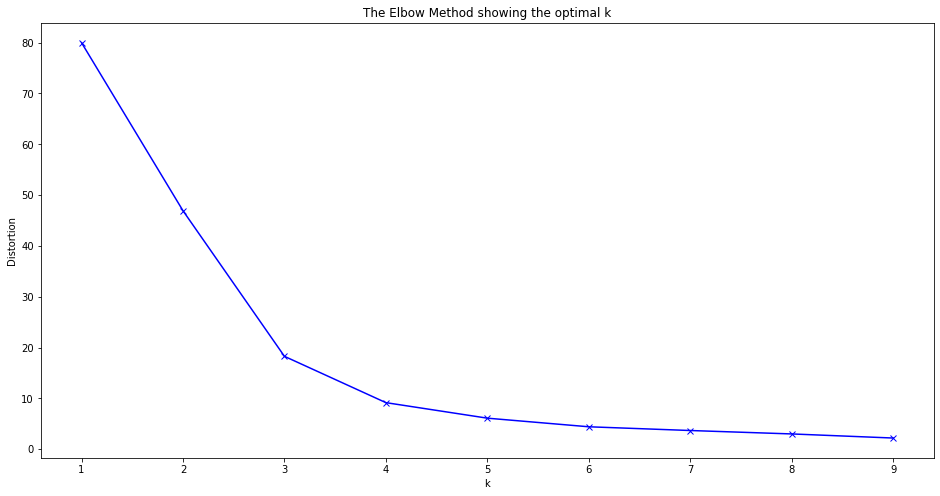

In [50]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The corresponding value of k to the curve's 'elbow' is 5. Starting from 5, the curve continues linearly. 

In [51]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clust)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 0, 0, 0, 2, 1, 0, 0], dtype=int32)

In [99]:
# add clustering labels
#df_merged.drop('Cluster Labels',1,inplace = True)
df_merged.insert(0, 'Cluster Labels', kmeans.labels_)
df_merged.set_index('Neighborhood', inplace=True)
df_merged.head()

,Cluster Labels,Borough,Median Household Income,Crime Rate (per 1000 people),Latitude,Longitude,Number of Government Buildings
Neighborhood,,,,,,,
Yorkville,1,Manhattan,98840,11.00,40.775930,-73.947118,4
Battery Park City,1,Manhattan,125434,12.77,40.711932,-74.016869,18
Carnegie Hill,1,Manhattan,125140,8.59,40.782683,-73.953256,4
Central Harlem,0,Manhattan,41490,28.73,40.815976,-73.943211,5
Chelsea,0,Manhattan,108570,36.97,40.744035,-74.003116,9


We can check the centroid values by averaging the features in each cluster.

In [101]:
df_merged.groupby('Cluster Labels').mean()

,Median Household Income,Crime Rate (per 1000 people),Latitude,Longitude,Number of Government Buildings
Cluster Labels,,,,,
0,77333.818182,37.410909,40.744572,-73.986015,8.727273
1,90302.578947,14.907895,40.787014,-73.961809,5.789474
2,156486.000000,22.830000,40.724793,-73.994596,90.333333
3,107765.666667,85.630000,40.741795,-73.990346,23.666667
4,102272.250000,26.500000,40.738554,-73.984451,30.500000


In [100]:
df_merged.reset_index(inplace = True)
df_merged

,Neighborhood,Cluster Labels,Borough,Median Household Income,Crime Rate (per 1000 people),Latitude,Longitude,Number of Government Buildings
0,Yorkville,1,Manhattan,98840,11.00,40.775930,-73.947118,4
1,Battery Park City,1,Manhattan,125434,12.77,40.711932,-74.016869,18
2,Carnegie Hill,1,Manhattan,125140,8.59,40.782683,-73.953256,4
3,Central Harlem,0,Manhattan,41490,28.73,40.815976,-73.943211,5
4,Chelsea,0,Manhattan,108570,36.97,40.744035,-74.003116,9
5,Chinatown,0,Manhattan,35908,41.88,40.715618,-73.994279,16
6,Civic Center,2,Manhattan,166436,17.91,40.715229,-74.005415,100
7,Clinton,1,Manhattan,73591,6.94,40.759101,-73.996119,12
8,East Harlem,0,Manhattan,37471,39.99,40.792249,-73.944182,6
9,East Village,0,Manhattan,72665,29.91,40.727847,-73.982226,5


Finally, let's visualize the resulting clusters

In [47]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_map['Latitude'], df_map['Longitude'], df_map['Neighborhood'], df_map['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Results 

The first cluster with the label 0 is the second most populated cluster. Those neighborhoods have medium to low tier income, moderate-high crime rate and the number of government buildings are low. Central Harlem, Chelsea and Chinatown belong to this cluster.   

In [104]:
df_merged.loc[df_merged['Cluster Labels']==0, df_merged.columns[[0] + list(range(3, df_merged.shape[1]))]]

,Neighborhood,Median Household Income,Crime Rate (per 1000 people),Latitude,Longitude,Number of Government Buildings
3,Central Harlem,41490,28.73,40.815976,-73.943211,5
4,Chelsea,108570,36.97,40.744035,-74.003116,9
5,Chinatown,35908,41.88,40.715618,-73.994279,16
8,East Harlem,37471,39.99,40.792249,-73.944182,6
9,East Village,72665,29.91,40.727847,-73.982226,5
12,Gramercy,100900,33.08,40.737210,-73.981376,9
13,Greenwich Village,119366,51.26,40.726933,-73.999914,9
15,Hudson Yards,88526,31.43,40.756658,-74.000111,7
20,Lower East Side,35859,27.69,40.717807,-73.980890,5
33,Tribeca,97228,52.48,40.721522,-74.010683,18


The second cluster with label 1, is the most populated cluster of all. These neighborhoods have medium tier income, relatively low rate of crime and small number of government buildings.

In [105]:
df_merged.loc[df_merged['Cluster Labels']==1, df_merged.columns[[0] + list(range(3, df_merged.shape[1]))]]

,Neighborhood,Median Household Income,Crime Rate (per 1000 people),Latitude,Longitude,Number of Government Buildings
0,Yorkville,98840,11.00,40.775930,-73.947118,4
1,Battery Park City,125434,12.77,40.711932,-74.016869,18
2,Carnegie Hill,125140,8.59,40.782683,-73.953256,4
7,Clinton,73591,6.94,40.759101,-73.996119,12
14,Hamilton Heights,39019,15.02,40.823604,-73.949688,4
16,Inwood,54575,15.54,40.867684,-73.921210,4
17,Lenox Hill,98797,17.05,40.768113,-73.958860,5
18,Lincoln Square,120337,9.52,40.773529,-73.985338,8
21,Manhattan Valley,85930,17.40,40.797307,-73.964286,6
22,Manhattanville,29182,17.90,40.816934,-73.957385,5


Third cluster with label 2 shows a upper tier income level, low rates of crime and high numbers of government buildings. 

In [106]:
df_merged.loc[df_merged['Cluster Labels']==2, df_merged.columns[[0] + list(range(3, df_merged.shape[1]))]]

,Neighborhood,Median Household Income,Crime Rate (per 1000 people),Latitude,Longitude,Number of Government Buildings
6,Civic Center,166436,17.91,40.715229,-74.005415,100
10,Financial District,171588,24.90,40.707107,-74.010665,97
35,Turtle Bay,131434,25.68,40.752042,-73.967708,74


Fourth cluster has medium-high tier median household income, highest rate of crime and moderate frequency of government building in the neighborhoods. 

In [107]:
df_merged.loc[df_merged['Cluster Labels']==3, df_merged.columns[[0] + list(range(3, df_merged.shape[1]))]]

,Neighborhood,Median Household Income,Crime Rate (per 1000 people),Latitude,Longitude,Number of Government Buildings
24,Midtown,112131,87.09,40.754691,-73.981669,36
25,Midtown South,103926,87.09,40.748510,-73.988713,22
30,Soho,107240,82.71,40.722184,-74.000657,13


The fifth and last cluster also has medium to high tier income but it differentiates itself with the medium-low crime rates per 1000 people and moderate number of government buildings. 

In [108]:
df_merged.loc[df_merged['Cluster Labels']==4, df_merged.columns[[0] + list(range(3, df_merged.shape[1]))]]

,Neighborhood,Median Household Income,Crime Rate (per 1000 people),Latitude,Longitude,Number of Government Buildings
11,Flatiron,117923,17.08,40.739673,-73.990947,23
19,Little Italy,66202,31.86,40.719324,-73.997305,30
27,Murray Hill,97458,36.11,40.748303,-73.978332,31
34,Tudor City,127506,20.95,40.746917,-73.971219,38


#### Discussion  
The cluster analysis of Manhattan Neighborhoods were successful in profiling the neighborhoods according to the features of Median Household Income, Crime Rate per 1000 people and Number of Government Buildings. The clusters represent quite different characteristics of neighborhoods, varying in observations for each feature. Commenting on each cluster was easier due to the evident difference in characteristics in clustered neighborhoods. 
I would like to suggest three issues about the whole process. First, the analysis can be performed with four clusters to compare the results and determine the better clustering of neighborhoods. Further steps can include evaluating the practical significance of both instances. Second, during the analysis, I had another idea of clustering: Could the types (rather than the number) of government buildings be a better attribute to build the clusters? The existence of different government building types such as police precinct, embassy, city hall ... etc. might have different relations with the crime rate or median household income. Third, although the variable 'crime rate per 1000 people' represented the overall crime in a neighborhood, more specific crimes might have reflected a better picture about neighborhood crime data. Homicide rates, specifically, are considered to be better indicator, however, the data was not available.     

#### Conclusion
In this study, I clustered 40 neighborhoods of Manhattan NYC according to their median household income, crime rates, and number of government buildings. A lot of other indicators of neighborhood characteristics such as school ratings or other demographic data might be included for a further study. Neighborhoods and cities change, they are like living organisms that evolve with generations of humankind. They also have many characteristics that may or may not be discovered by data. I'd like to conclude with a quote from Hans Rösling from his book 'Factlulness': 'The world cannot be understood without numbers. But the world cannot be understood with numbers alone.' As an aspiring analyst, I see this project as an important accomplishment, for it was my introduction to a whole new world of Data Science.